In [100]:
import numpy as np
import pandas as pd
import requests
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import seaborn as sns
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 800)

In [129]:
#https://www.centreforcities.org/data-tool/su/6d5b08f4

df = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_UK\Centre_for_cities_full_data.csv')
df = df[:63]
df = df.drop(4)
df.columns = df.columns.str.replace('\\([^()]{0,}\\)','')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace("(â£)",'')
df.columns = df.columns.str.replace(" ","")

df.head(7)

,city,averageweeklyworkplaceearnings2004,averageweeklyworkplaceearnings2005,averageweeklyworkplaceearnings2006,averageweeklyworkplaceearnings2007,averageweeklyworkplaceearnings2008,averageweeklyworkplaceearnings2009,averageweeklyworkplaceearnings2010,averageweeklyworkplaceearnings2011,averageweeklyworkplaceearnings2012,averageweeklyworkplaceearnings2013,averageweeklyworkplaceearnings2014,averageweeklyworkplaceearnings2015,averageweeklyworkplaceearnings2016,averageweeklyworkplaceearnings2017,averageweeklyworkplaceearnings2018,averageweeklyworkplaceearnings2019,averageweeklyworkplaceearnings2020,businesschurnrate2004,businesschurnrate2005,businesschurnrate2006,businesschurnrate2007,businesschurnrate2008,businesschurnrate2009,businesschurnrate2010,businesschurnrate2011,businesschurnrate2012,businesschurnrate2013,businesschurnrate2014,businesschurnrate2015,businesschurnrate2016,businesschurnrate2017,businesschurnrate2018,businesschurnrate2019,businessclosures2004,businessclosures2005,businessclosures2006,businessclosures2007,businessclosures2008,businessclosures2009,businessclosures2010,businessclosures2011,businessclosures2012,businessclosures2013,businessclosures2014,businessclosures2015,businessclosures2016,businessclosures2017,businessclosures2018,businessclosures2019,businessstart-ups2004,businessstart-ups2005,businessstart-ups2006,businessstart-ups2007,businessstart-ups2008,businessstart-ups2009,businessstart-ups2010,businessstart-ups2011,businessstart-ups2012,businessstart-ups2013,businessstart-ups2014,businessstart-ups2015,businessstart-ups2016,businessstart-ups2017,businessstart-ups2018,businessstart-ups2019,businessstock2004,businessstock2005,businessstock2006,businessstock2007,businessstock2008,businessstock2009,businessstock2010,businessstock2011,businessstock2012,businessstock2013,businessstock2014,businessstock2015,businessstock2016,businessstock2017,businessstock2018,businessstock2019,claimantcountjan2013,claimantcountfeb2013,claimantcountmar2013,claimantcountapr2013,claimantcountmay2013,claimantcountjun2013,claimantcountjul2013,claimantcountaug2013,claimantcountsep2013,claimantcountoct2013,claimantcountnov2013,claimantcountdec2013,claimantcountjan2014,claimantcountfeb2014,claimantcountmar2014,claimantcountapr2014,claimantcountmay2014,claimantcountjun2014,claimantcountjul2014,claimantcountaug2014,claimantcountsep2014,claimantcountoct2014,claimantcountnov2014,claimantcountdec2014,claimantcountjan2015,claimantcountfeb2015,claimantcountmar2015,claimantcountapr2015,claimantcountmay2015,claimantcountjun2015,claimantcountjul2015,claimantcountaug2015,claimantcountsep2015,claimantcountoct2015,claimantcountnov2015,claimantcountdec2015,claimantcountjan2016,claimantcountfeb2016,claimantcountmar2016,claimantcountapr2016,claimantcountmay2016,claimantcountjun2016,claimantcountjul2016,claimantcountaug2016,claimantcountsep2016,claimantcountoct2016,claimantcountnov2016,claimantcountdec2016,claimantcountjan2017,claimantcountfeb2017,claimantcountmar2017,claimantcountapr2017,claimantcountmay2017,claimantcountjun2017,claimantcountjul2017,claimantcountaug2017,claimantcountsep2017,claimantcountoct2017,claimantcountnov2017,claimantcountdec2017,claimantcountjan2018,claimantcountfeb2018,claimantcountmar2018,claimantcountapr2018,claimantcountmay2018,claimantcountjun2018,claimantcountjul2018,claimantcountaug2018,claimantcountsep2018,claimantcountoct2018,claimantcountnov2018,claimantcountdec2018,claimantcountjan2019,claimantcountfeb2019,claimantcountmar2019,claimantcountapr2019,claimantcountmay2019,claimantcountjun2019,claimantcountjul2019,claimantcountaug2019,claimantcountsep2019,claimantcountoct2019,claimantcountnov2019,claimantcountdec2019,claimantcountjan2020,claimantcountfeb2020,claimantcountmar2020,claimantcountapr2020,claimantcountmay2020,claimantcountjun2020,claimantcountjul2020,claimantcountaug2020,claimantcountsep2020,claimantcountoct2020,claimantcountnov2020,claimantcountdec2020,claimantcountjan2021,co2emissionspercapita2005,co2emiss

In [133]:
sdf = df.loc[:,['city','averageweeklyworkplaceearnings2019','businessstart-ups2019','co2emissionspercapita2018','gdp2018','gdpperworker2018','housingaffordabilityratio2019','housingstock2019','meanhouseprice2018','ultrafastbroadband2019','privateknowledgeintensivebusinessservices2019','workingagepopulationwithaqualificationatnvq4orabove2018','patentapplications2018','population2019','employmentrate2018']]

#sdf['gdp2018'] = sdf['gdp2018'].astype(float)

In [134]:
for i in ['averageweeklyworkplaceearnings2019','businessstart-ups2019','co2emissionspercapita2018','gdp2018','gdpperworker2018','housingaffordabilityratio2019','housingstock2019','meanhouseprice2018','ultrafastbroadband2019','privateknowledgeintensivebusinessservices2019','workingagepopulationwithaqualificationatnvq4orabove2018','patentapplications2018','population2019','employmentrate2018']:
    sdf[i] = sdf[i].astype(float)

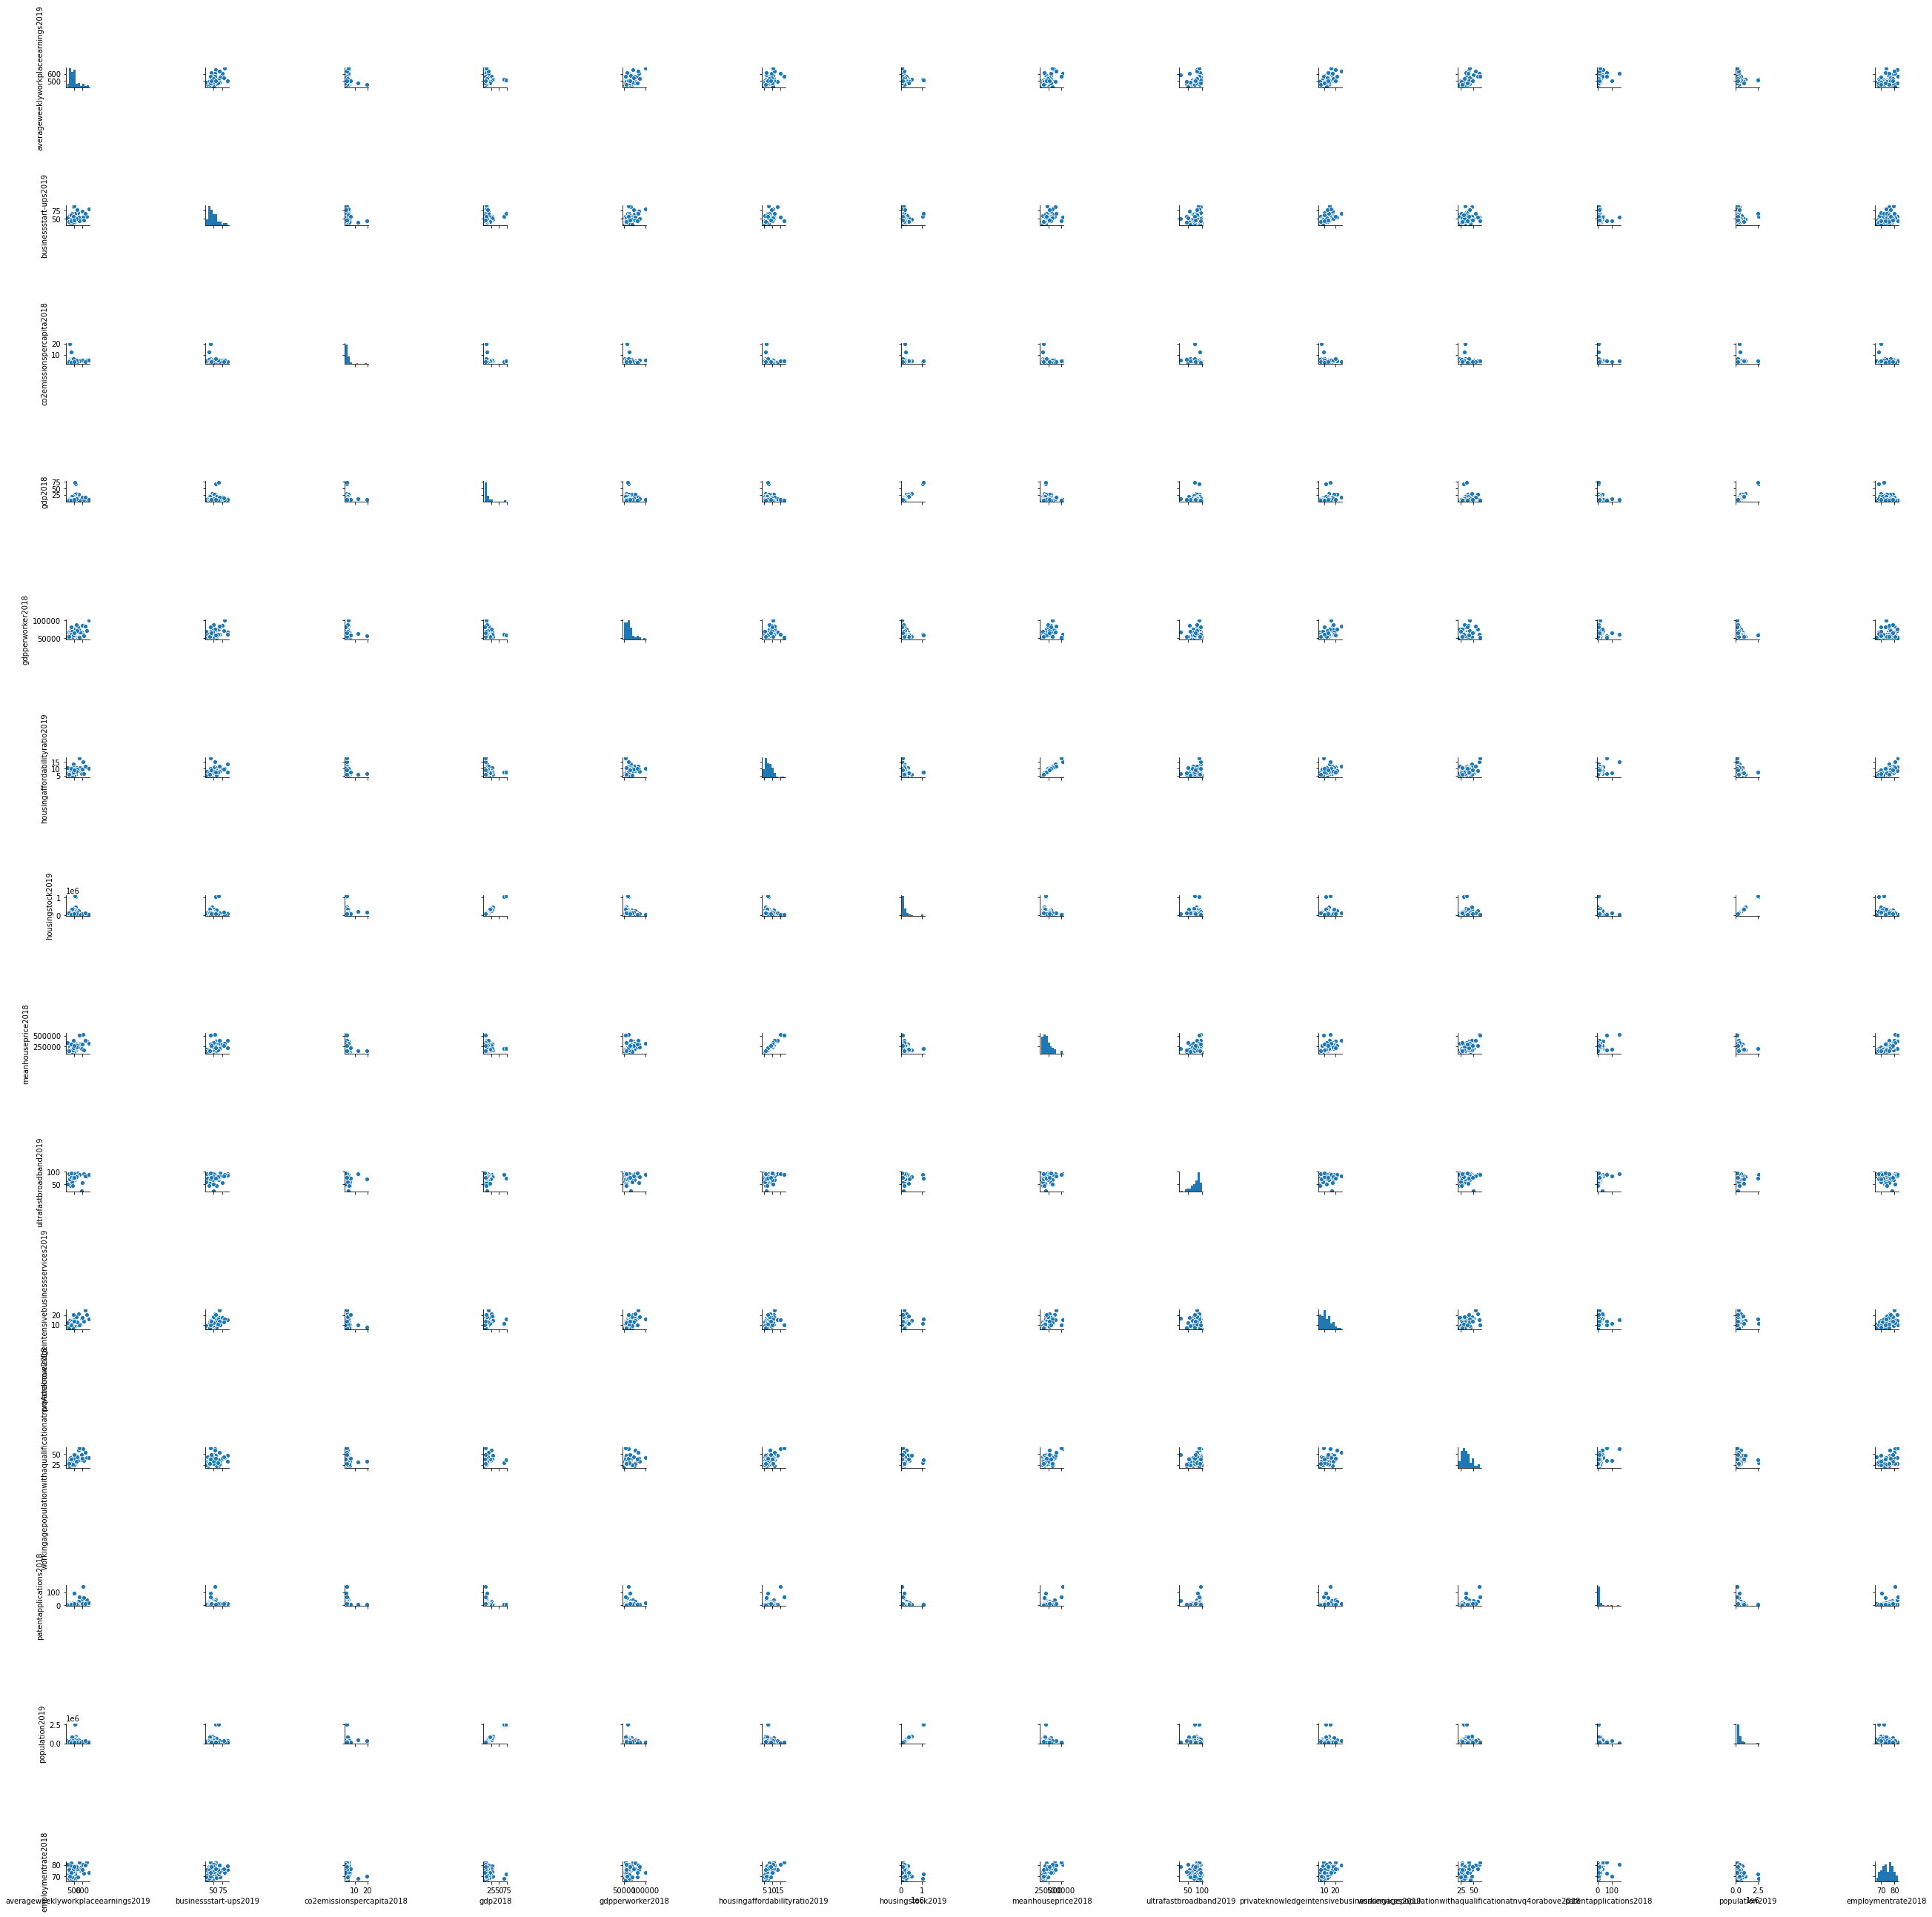

In [136]:

sns.pairplot(sdf[sdf.city != 'London'], height=2.5)

In [135]:
#sdf['gdpperworker2018'] = sdf['gdpperworker2018'].astype(float)
sdf['gdpperworker2018'].unique()

array([66091., 71278., 52929., 74161., 57519., 60695., 48736., 52699.,
       60187., 53571., 65994., 66934., 67507., 59751., 59926., 66073.,
       63884., 66063., 57043., 53298., 52143., 75134., 61058., 54306.,
       55256., 53463., 53796., 75116., 60325., 57523., 59862., 91297.,
       80903., 58070., 49689., 61795., 84784., 53474., 52017., 60379.,
       57842., 58064., 52171., 61356., 55423., 61453., 66677., 83801.,
       53786., 99988., 71760., 54547., 61359., 68795., 56475., 86814.,
       61554., 55226., 59670., 55364., 81265., 64384.])